In [ ]:
%pip install librosa

In [238]:
import matplotlib.pyplot as plt
%matplotlib inline

In [239]:
filename = 'static1_6664341771270495341.wav'

In [240]:
import IPython.display as ipd
import librosa
import librosa.display

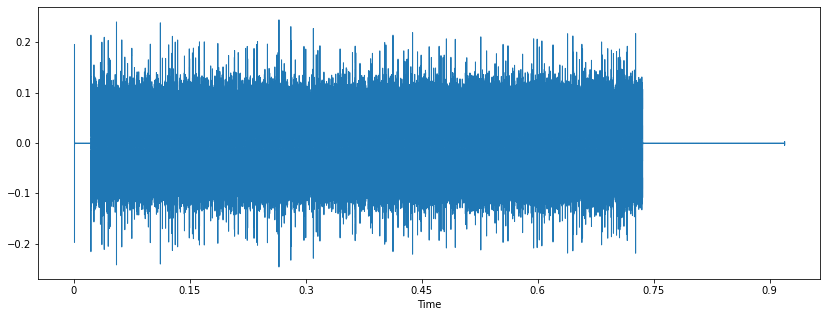

In [241]:
##olivia static sound
plt.figure(figsize=(14,5))
data, sr = librosa.load(filename)
librosa.display.waveshow(data, sr=192000) ## set to the 192kHz Dr. Tan mentioned
ipd.Audio(filename)

In [242]:
### reading with scipy for two channels w/out normalization
audio_file_path = 'static1_6664341771270495341.wav'
from scipy.io  import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


In [243]:
wave_audio  ##no need to worry about the two channels being normalized, one channel has no info 

array([16728, 16033, -7155, ...,     0, 11177,    46], dtype=int16)

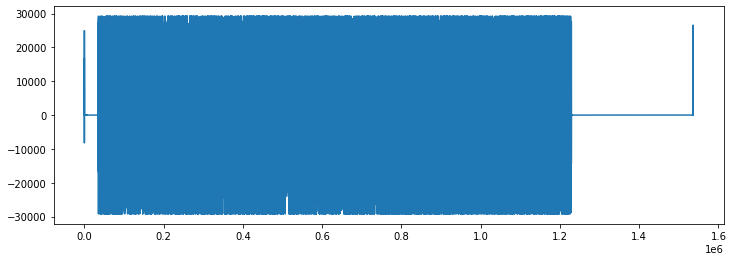

In [244]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,4))
plt.plot(wave_audio)

#I'm assuming the  graph looks slightly more different because of the sample_rate changes

In [245]:
import pandas as pd
metadata = pd.read_csv('wav_folder/20k-16k data - Sheet1.csv')
metadata.head(10)

slice file name  classID   class
0  static1_6664341771270495341.wav        1  static
1  static2_7588950161791274142.wav        1  static
2  static3_6248064297729464516.wav        1  static
3  static4_5752769004397675183.wav        1  static
4  static5_5274293778879758339.wav        1  static
5   static6_470647232742212569.wav        1  static
6  static7_1204764617161772994.wav        1  static
7  static8_3307091513075021901.wav        1  static
8  static9_5677164544933011014.wav        1  static
9  static10_320347585563374429.wav        1  static

In [246]:
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=192000, n_mfcc=40)
print(mfccs.shape)
#array of dimensions

(40, 345)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


In [247]:
mfccs

array([[ -346.8582   ,  -413.1406   , -1032.5479   , ..., -1032.5488   ,
         -421.76123  ,  -239.56828  ],
       [    1.4876398,     3.7307   ,     7.4331036, ...,     7.431904 ,
           33.660103 ,    27.72479  ],
       [  -40.159718 ,   -38.242813 ,     7.4057493, ...,     7.404554 ,
          -49.714104 ,   -54.71301  ],
       ...,
       [    2.094282 ,     1.8903761,    -1.3445398, ...,    -1.3442769,
            1.9582052,     2.5241656],
       [   -2.41827  ,    -2.4141464,    -1.6459928, ...,    -1.6456807,
           -2.141873 ,    -2.1862907],
       [   -2.272798 ,    -2.0134017,    -1.9395828, ...,    -1.9392233,
           -2.7698603,    -3.5095465]], dtype=float32)

In [248]:
###extracting MFCC  for every audio file 
import pandas as pd 
import os 
import librosa 

audio_dataset_path='wav_folder/'
metadata=pd.read_csv('wav_folder/20k-16k data - Sheet1.csv')
metadata.head(5)

slice file name  classID   class
0  static1_6664341771270495341.wav        1  static
1  static2_7588950161791274142.wav        1  static
2  static3_6248064297729464516.wav        1  static
3  static4_5752769004397675183.wav        1  static
4  static5_5274293778879758339.wav        1  static

In [249]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file_name, sr=192000, res_type ='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=192000, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)
    
    return mfccs_scaled_features

In [250]:
import numpy as np 
from tqdm import tqdm

extracted_features=[]
for index_num, row in tqdm(metadata.iterrows()): 
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row["classID"]) + '/', str(row["slice file name"]))
    final_class_labels = row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
1it [00:00,  6.18it/s]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
2it [00:00,  6.12it/s]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
3it [00:00,  6.52it/

In [251]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature   class
0  [-478.47308, -82.40662, -42.80473, -13.992498,...  static
1  [-478.47308, -82.40662, -42.80473, -13.992498,...  static
2  [-478.47308, -82.40662, -42.80473, -13.992498,...  static
3  [-478.47308, -82.40662, -42.80473, -13.992498,...  static
4  [-478.47308, -82.40662, -42.80473, -13.992498,...  static

In [252]:
### Splitting the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [253]:
##number of records, n_mfccs
X.shape

(60, 40)

In [254]:
##Label encoding
y=np.array(pd.get_dummies(y))

In [255]:
# shows the number of recordings, different classes
y.shape

(60, 3)

In [256]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [257]:
X_train

array([[-4.7847308e+02, -8.2406616e+01, -4.2804729e+01, ...,
         2.8353105e+00, -1.7414964e+00,  5.8327407e-02],
       [-4.7847308e+02, -8.2406616e+01, -4.2804729e+01, ...,
         2.8353105e+00, -1.7414964e+00,  5.8327407e-02],
       [-4.7847308e+02, -8.2406616e+01, -4.2804729e+01, ...,
         2.8353105e+00, -1.7414964e+00,  5.8327407e-02],
       ...,
       [-4.7847308e+02, -8.2406616e+01, -4.2804729e+01, ...,
         2.8353105e+00, -1.7414964e+00,  5.8327407e-02],
       [-4.7847308e+02, -8.2406616e+01, -4.2804729e+01, ...,
         2.8353105e+00, -1.7414964e+00,  5.8327407e-02],
       [-4.7847308e+02, -8.2406616e+01, -4.2804729e+01, ...,
         2.8353105e+00, -1.7414964e+00,  5.8327407e-02]], dtype=float32)

In [258]:
y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [259]:
X_train.shape

(48, 40)

In [260]:
X_test.shape

(12, 40)

In [261]:
y_train.shape

(48, 3)

In [262]:
y_test.shape

(12, 3)

In [263]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [264]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [265]:
## number of classes
num_labels = y.shape[1]

In [266]:
##creating an ANN with three layers
model=Sequential()

##first layer 
model.add(Dense(100,input_shape=(40,)))     #first layer has 100 neurons, with an input shape of 40 because training had 40 features
model.add(Activation('relu'))
model.add(Dropout(0.01))

##second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.01))

##third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.01))

##final layer
model.add(Dense(num_labels))    #nothing but number of classes 
model.add(Activation('relu'))    #softmax bc its a multiclass classification

In [267]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               4100      
                                                                 
 activation_27 (Activation)  (None, 100)               0         
                                                                 
 dropout_21 (Dropout)        (None, 100)               0         
                                                                 
 dense_28 (Dense)            (None, 200)               20200     
                                                                 
 activation_28 (Activation)  (None, 200)               0         
                                                                 
 dropout_22 (Dropout)        (None, 200)               0         
                                                                 
 dense_29 (Dense)            (None, 100)              

In [268]:
import keras
optimizer=keras.optimizers.Adam(learning_rate=0.01)
# model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam'(lr=0.01))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

In [272]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 5

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
 1/10 [==>...........................] - ETA: 0s - loss: nan - accuracy: 0.0000e+00
Epoch 1: val_loss did not improve from inf
10/10 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.3125 - val_loss: nan - val_accuracy: 0.4167
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: nan - accuracy: 0.2000
Epoch 2: val_loss did not improve from inf
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3125 - val_loss: nan - val_accuracy: 0.4167
Epoch 3/100
 1/10 [==>...........................] - ETA: 0s - loss: nan - accuracy: 0.2000
Epoch 3: val_loss did not improve from inf
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3125 - val_loss: nan - val_accuracy: 0.4167
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: nan - accuracy: 0.2000
Epoch 4: val_loss did not improve from inf
10/10 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.3125 - 

In [273]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])


0.4166666567325592


In [271]:
print("slight change")

slight change
